In [1]:
import json
import os
import time

import matplotlib.pyplot as plt
import numpy as np

from alphazero import ChessBoard
from arena import *

In [2]:
# r = [MaxSigmoidTerritory] * 3 + [MaxTerritory] + [MaxDictTerritory] * 2 + [MaxPercentSigmoidTerritory] * 3
# p = [
#     {"name": "Max 2x+2", "K": 2, "B": 2},
#     {"name": "Max 2x+1", "K": 2, "B": 1},
#     {"name": "Max 3x+1", "K": 3, "B": 1},
#     {"name": "Max 0/0.5/1"},
#     {"name": "Max 0.2/0.5/0.8/1", "D": {0: 0.2, -1: 0.5, -2: 0.8, -3: 1}},
#     {"name": "Max 0.1/0.3/0.7/1", "D": {0: 0.1, -1: 0.3, -2: 0.7, -3: 1}},
#     {"name": "MaxRel 2x+2", "K": 2, "B": 2},
#     {"name": "MaxRel 2x+1", "K": 2, "B": 1},
#     {"name": "MaxRel 3x+1", "K": 3, "B": 1},
# ]

# r = [MaxPercentSigmoidTerritory] * 2
# p = [{"name": "MaxRel 2x+1", "K": 2, "B": 1},
#      {"name": "MaxRel 3x+1", "K": 3, "B": 1}, ]

r = [Random] * 2
p = [{}, {}]

arena = Arena(ChessBoard(), robots=r, param_list=p, N=10000)
history = arena.match()


Playing: 100%|███████████████████████████| 10000/10000 [00:44<00:00, 223.32it/s]


In [3]:
os.makedirs('../log/arena', exist_ok=True)
print(len(history))
t = time.strftime('%Y-%m-%d_%H-%M-%S', time.localtime(time.time()))
with open(f'../log/arena/match_history_{t}.json', 'w', encoding='utf-8') as f:
    json.dump(history, f)

10000


NAME                   ELO           WIN-DRAW-LOSE
Random Bot          1063.4 1005.4 5111-78-4811
Random Bot           936.6  994.6 4811-78-5111


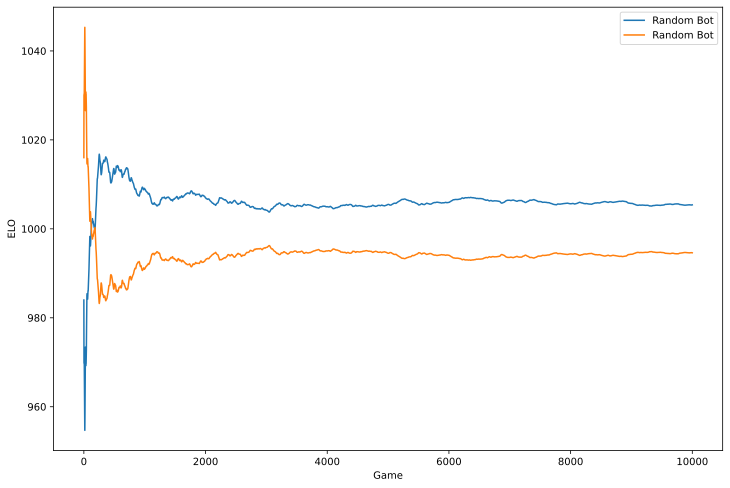

In [4]:
print("=" * 60)
print("NAME                   ELO           WIN-DRAW-LOSE")
print("=" * 60)

%config InlineBackend.figure_format='svg'#输出矢量图设置
plt.figure(figsize=(12, 8))

for robot in arena.robots:
    print(
        f"{robot.name:<20}{str(round(robot.elo, 1)):>6} {str(round(np.mean(robot.elos), 1)):>6} {robot.results.count(1)}-{robot.results.count(0.5)}-{robot.results.count(0)}")
    x = np.arange(len(robot.elos))
    y = np.array([np.mean(robot.elos[:i + 1]) for i in x])
    plt.plot(x, y, label=robot.name)
plt.legend()
plt.xlabel("Game")
plt.ylabel("ELO")
plt.show()